In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

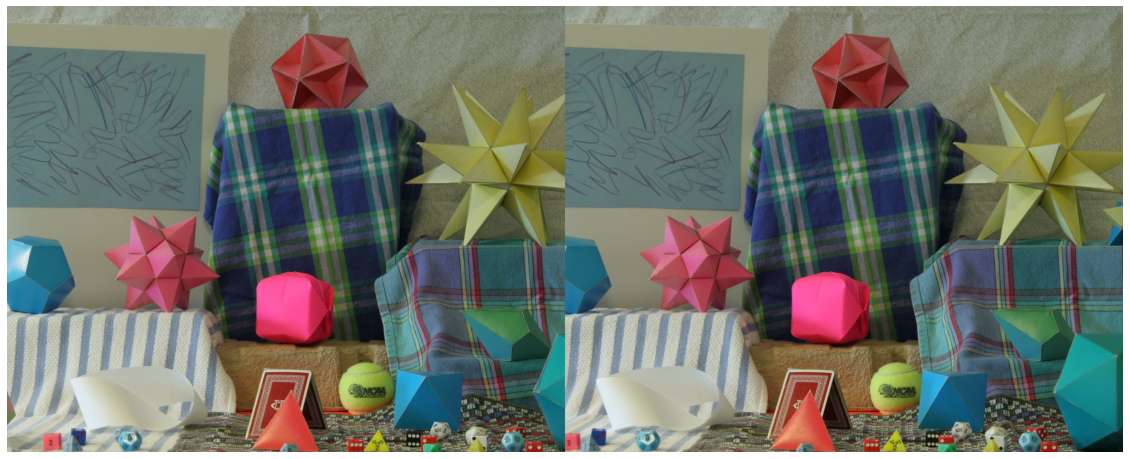

In [42]:
#读入图像
fst = r"image\example1\1.png"
scd = r"image\example1\2.png"

path1,path2=[fst,scd]
left_img = cv2.imread(path1)
right_img = cv2.imread(path2)

img3 = np.concatenate((left_img, right_img), axis = 1)

#显示原始图片
fig = plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [43]:
# 将图像转换为灰度图
left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)

In [44]:
# 创建立体匹配器对象
# stereo = cv2.StereoBM_create(numDisparities=64, blockSize=21)

window_size = 5
min_disp = -1
num_disp = 16 * 5
stereo = cv2.StereoSGBM_create(minDisparity=min_disp,
                               numDisparities=num_disp,
                               blockSize=16,
                               P1=8 * 3 * window_size ** 2,
                               P2=32 * 3 * window_size ** 2,
                               disp12MaxDiff=1,
                               uniquenessRatio=10,
                               speckleWindowSize=100,
                               speckleRange=32)

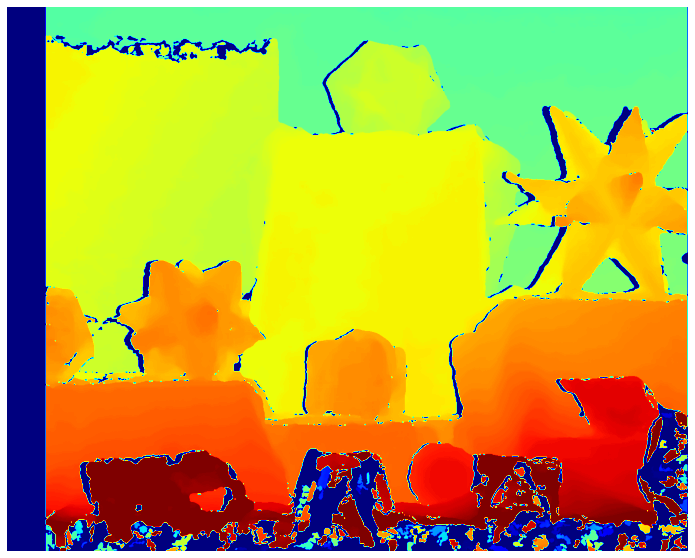

In [45]:
# 计算视差图
disparity = stereo.compute(left_gray, right_gray)

# 归一化视差图
disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

#显示视差图
fig = plt.figure(figsize=(20, 10))
plt.imshow(disparity_normalized, cmap='jet')
plt.axis('off')
plt.show()